Preprossin Data

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,train_test_split, learning_curve, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('/home/mm/code/Reem24Alamri/hospitai/raw_data/healthcare_prediction_dataset (1).csv')

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.shape

(55500, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df.describe()  # Descriptive statistics for numerical features

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df.duplicated().sum()

534

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sort_values(ascending=False)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
df = df[df['Billing Amount'] > 0]

In [10]:
df.shape

(54860, 15)

# Feature Engineering

In [11]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54860 non-null  object        
 1   Age                 54860 non-null  int64         
 2   Gender              54860 non-null  object        
 3   Blood Type          54860 non-null  object        
 4   Medical Condition   54860 non-null  object        
 5   Date of Admission   54860 non-null  datetime64[ns]
 6   Doctor              54860 non-null  object        
 7   Hospital            54860 non-null  object        
 8   Insurance Provider  54860 non-null  object        
 9   Billing Amount      54860 non-null  float64       
 10  Room Number         54860 non-null  int64         
 11  Admission Type      54860 non-null  object        
 12  Discharge Date      54860 non-null  datetime64[ns]
 13  Medication          54860 non-null  object    

In [32]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df['Admission_month'] = df['Date of Admission'].dt.month
df['StayDuration'] = ((df['Discharge Date'] - df['Date of Admission'])).dt.days
df.drop(columns=[
    'Date of Admission',
    'Discharge Date',
    'Name',
    'Doctor',
    'Hospital',
    'Room Number'], inplace=True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Admission_month,StayDuration
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,1,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,8,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,9,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,11,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,9,20


In [13]:
# calculate the sin and cos
months_in_a_year = 12

df['sin_Admission'] = np.sin(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)
df['cos_Admission'] = np.cos(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)

df.drop(columns='Admission_month', inplace=True)

df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,StayDuration,sin_Admission,cos_Admission
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2,0.000000,1.000000
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6,-0.500000,-0.866025
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15,-0.866025,-0.500000
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30,-0.866025,0.500000
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20,-0.866025,-0.500000


In [14]:
X = df.drop(columns='StayDuration')
y = df['StayDuration']

In [15]:
X.shape

(54860, 11)

In [16]:
X.shape

(54860, 11)

# Non numerical features

In [17]:
X_non_numerical = X.select_dtypes(exclude=['number'])

X_non_numerical

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,Male,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,Male,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,Female,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,Female,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,Female,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,Female,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,Female,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,Male,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


## One hot encoder

In [18]:
# ohe for gender
ohe_gender = OneHotEncoder(sparse_output=False, drop="if_binary")
ohe_gender.fit(X_non_numerical[['Gender']])

X_non_numerical[ohe_gender.get_feature_names_out()] = ohe_gender.transform(X_non_numerical[['Gender']])
X_non_numerical.drop(columns='Gender', inplace=True)
X_non_numerical.rename(columns={'Gender_Male':'Gender'}, inplace=True)
X_non_numerical.head()

,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Gender
0,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal,1.0
1,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive,1.0
2,A-,Obesity,Aetna,Emergency,Aspirin,Normal,0.0
3,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal,0.0
4,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal,0.0


In [19]:
# ohe for the rest
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_non_numerical.drop(columns='Gender'))

X_non_numerical[ohe.get_feature_names_out()] = ohe.transform(X_non_numerical.drop(columns='Gender'))
X_non_numerical = X_non_numerical.iloc[:, 6:]

X_non_numerical.head()

,Gender,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,...,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [20]:
X_non_numerical.shape

(54860, 31)

In [21]:
X_non_numerical.columns

Index(['Gender', 'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+',
       'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+',
       'Blood Type_O-', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Insurance Provider_Aetna',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Admission Type_Elective', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Medication_Aspirin', 'Medication_Ibuprofen',
       'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin',
       'Test Results_Abnormal', 'Test Results_Inconclusive',
       'Test Results_Normal'],
      dtype='object')

# MinMax Scaler

In [22]:
X_numerical = X[['Age', 'Billing Amount']]

minmax_scaler = MinMaxScaler()

X_numerical = minmax_scaler.fit_transform(X_numerical)
X_numerical = pd.DataFrame(data=X_numerical, columns=['Age', 'Billing Amount'])

X_numerical.head()

,Age,Billing Amount
0,0.223684,0.357256
1,0.644737,0.637552
2,0.828947,0.529729
3,0.197368,0.718425
4,0.394737,0.269720


In [23]:
X_numerical.shape

(54860, 2)

In [24]:
X.shape

(54860, 11)

# Final Dataframe

In [33]:
X_numerical_reset = X_numerical.reset_index(drop=True)
X_non_numerical_reset = X_non_numerical.reset_index(drop=True)
X_sin_cos = X[['sin_Admission', 'cos_Admission']].reset_index(drop=True)

X_processed = pd.concat([X_numerical_reset, X_non_numerical_reset, X_sin_cos], axis=1)
X_processed

,Age,Billing Amount,Gender,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,sin_Admission,cos_Admission
0,0.223684,0.357256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000e+00,1.000000e+00
1,0.644737,0.637552,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-5.000000e-01,-8.660254e-01
2,0.828947,0.529729,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.660254e-01,-5.000000e-01
3,0.197368,0.718425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-8.660254e-01,5.000000e-01
4,0.394737,0.269720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54855,0.381579,0.050071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-5.000000e-01,-8.660254e-01
54856,0.631579,0.596124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000e+00,1.000000e+00
54857,0.328947,0.523391,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.224647e-16,-1.000000e+00
54858,0.394737,0.614953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.660254e-01,-5.000000e-01


## Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43888, 11)
(10972, 11)
(43888,)
(10972,)


In [29]:
X = pd.get_dummies(data,
                   columns=[
                       'Gender',
                       'Blood Type',
                       'Medical Condition',
                       'Test Results',
                       'Admission Type',
                       'Medication',
                       'Insurance Provider'])
X

NameError: name 'data' is not defined

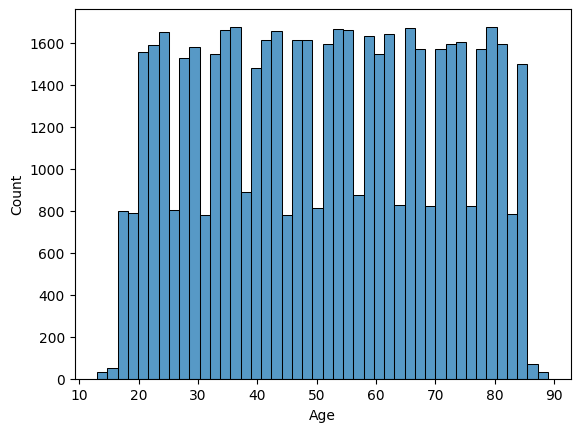

In [15]:
sns.histplot(X['Age']);

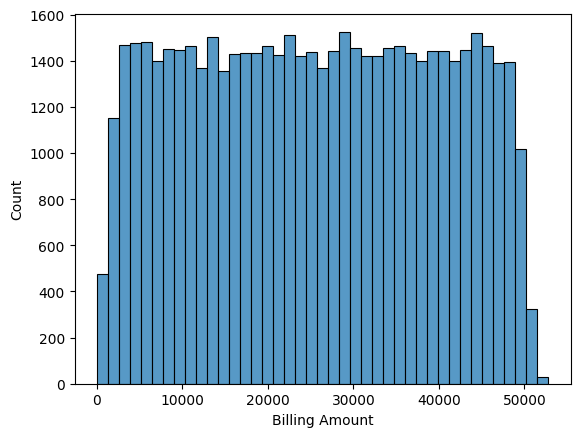

In [16]:
sns.histplot(X['Billing Amount']);

In [17]:
minmax = MinMaxScaler()

In [18]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,StayDuration
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20


In [19]:
unique_counts = data.nunique()
print(unique_counts)

Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Insurance Provider        5
Billing Amount        49904
Admission Type            3
Medication                5
Test Results              3
StayDuration             30
dtype: int64


In [20]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,StayDuration
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 55499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 54860 non-null  int64  
 1   Gender              54860 non-null  object 
 2   Blood Type          54860 non-null  object 
 3   Medical Condition   54860 non-null  object 
 4   Insurance Provider  54860 non-null  object 
 5   Billing Amount      54860 non-null  float64
 6   Admission Type      54860 non-null  object 
 7   Medication          54860 non-null  object 
 8   Test Results        54860 non-null  object 
 9   StayDuration        54860 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 4.6+ MB


In [22]:
data.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication',
       'Test Results', 'StayDuration'],
      dtype='object')

In [23]:
X = data.drop(['StayDuration','Insurance Provider','Billing Amount'], axis=1)
y = data['StayDuration']

In [24]:
# Split the data into training and test sets (80% training, 20% testing)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
y_pred

ValueError: could not convert string to float: 'Female'

In [43]:
# from sklearn.model_selection import cross_validate
cv_results = cross_validate(RandomForestRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')
cv_results

{'fit_time': array([8.54124546, 8.83199096, 8.4002645 , 8.17779851, 8.31673288]),
 'score_time': array([0.18935442, 0.19743824, 0.17051244, 0.16859412, 0.22447896]),
 'test_score': array([-0.10372925, -0.1183339 , -0.11409109, -0.09624972, -0.11659139])}

In [30]:
X_train

NameError: name 'X_train' is not defined